# Import Required Libraries
Import the necessary libraries, including os, pandas, matplotlib, and seaborn.

In [129]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Function to Calculate Compression Ratio
Define a function that takes the path of the original file and the path of the compressed file, and returns the compression ratio.

In [130]:
def calculate_compression_ratio(original_file, compressed_file):
    original_size = os.path.getsize(original_file)
    compressed_size = os.path.getsize(compressed_file)
    return original_size / compressed_size

# Load and Analyze Files
Use the os library to load the files from the 'compressed/' directory and its subdirectories. Analyze the files to determine their type based on the subdirectory they are in.

In [131]:
# Define the directory path
original_dir_path = '../test/raw/'
directory_path = '../test/compressed/'
results = []

for subdir, dirs, files in os.walk(directory_path):
    if subdir == directory_path:
        continue
       
    for file in files:
        file_path = os.path.join(subdir, file)
        raw_file_path = file_path.replace('compressed/', 'raw/')
        raw_file_path = raw_file_path.replace('.bin', '.txt')
        compression_ratio = calculate_compression_ratio(file_path, raw_file_path)
        
        original_size = os.path.getsize(raw_file_path)
        compressed_size = os.path.getsize(file_path)
        results.append({
            'compressed': file,
            'original': raw_file_path.split('/')[-1],
            'compressed_size': compressed_size,
            'original_size': original_size,
            'type': subdir.split('/')[-1],
            'compression_ratio': compression_ratio,
            'compression_efficiency': (original_size - compressed_size) / original_size * 100,
        })

df = pd.DataFrame(results)

In [132]:
df.head()

,compressed,original,compressed_size,original_size,type,compression_ratio,compression_efficiency
0,normal_1000.bin,normal_1000.txt,1477,966,normal,1.528986,-52.898551
1,normal_500000.bin,normal_500000.txt,334149,499952,normal,0.668362,33.163784
2,normal_50000.bin,normal_50000.txt,34639,49968,normal,0.693224,30.677634
3,normal_5000000.bin,normal_5000000.txt,3326628,4999951,normal,0.665332,33.466788
4,normal_10000.bin,normal_10000.txt,7798,9964,normal,0.782617,21.738258


# Visualize Compression Ratios
Use matplotlib and seaborn to visualize the compression ratios, with different types of files represented by different colors.

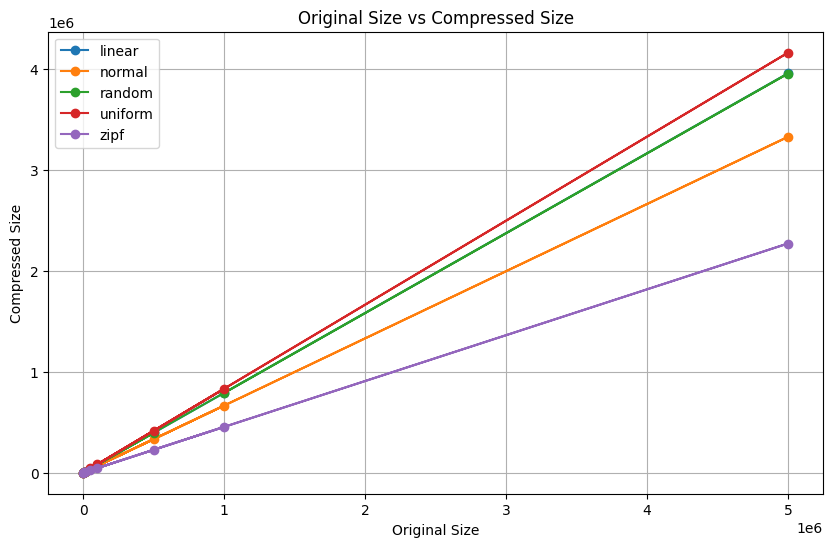

In [133]:
plt.figure(figsize=(10, 6))
grouped_df = df.groupby('type')
for group_name, group_df in grouped_df:
    df_type = group_df
    
    plt.plot(df_type['original_size'], df_type['compressed_size'], '-o', label=group_name)  # Add label parameter
    plt.xlabel('Original Size')
    plt.ylabel('Compressed Size')
    plt.title('Original Size vs Compressed Size')
    plt.grid(True)
    plt.legend()  # Add legend

plt.show()

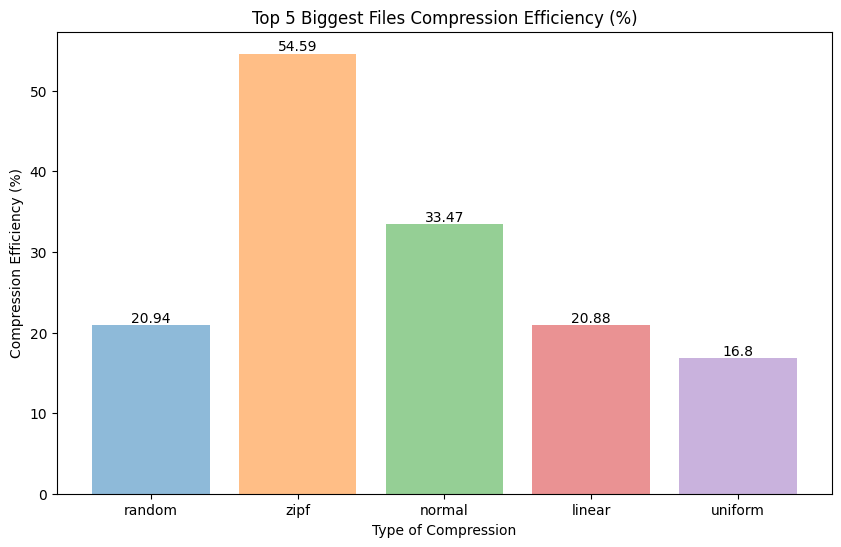

In [134]:
biggest_files_df = df.sort_values(by='original_size', ascending=False).head(5)

plt.figure(figsize=(10, 6))
for index, row in biggest_files_df.iterrows():
    plt.bar(row['type'], row['compression_efficiency'], alpha=0.5)
    plt.text(row['type'], row['compression_efficiency'], round(row['compression_efficiency'], 2), ha='center', va='bottom')

plt.xlabel('Type of Compression')
plt.ylabel('Compression Efficiency (%)')
plt.title('Top 5 Biggest Files Compression Efficiency (%)')
plt.show()


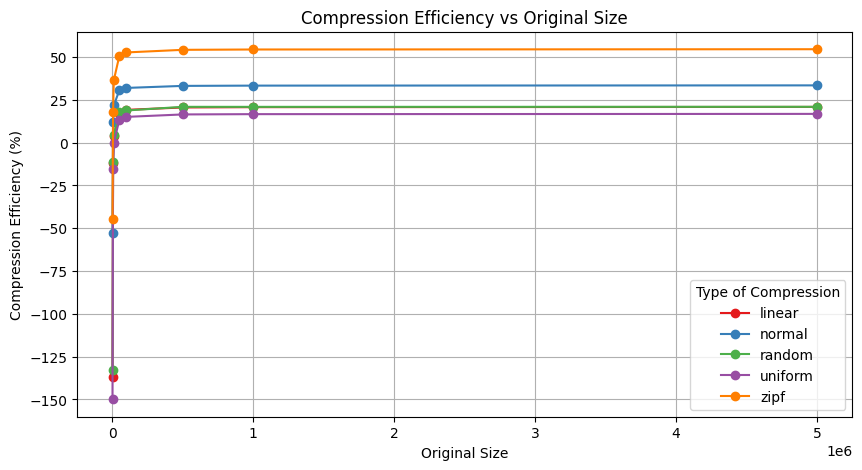

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette for each type of compression
color_palette = sns.color_palette('Set1', n_colors=len(df['type'].unique()))

# Plot the evolution of compression efficiency over original size
plt.figure(figsize=(10, 5))

# Group DataFrame by type of compression
grouped_df = df.groupby('type')

# Iterate over groups and plot data
for i, (group_name, group_df) in enumerate(grouped_df):
    # Sort the DataFrame by original size
    group_df = group_df.sort_values(by='original_size')
    # Plot the data
    plt.plot(group_df['original_size'], group_df['compression_efficiency'], 
             linestyle='-', marker='o', markersize=6, color=color_palette[i], label=group_name)

# Set labels and title
plt.xlabel('Original Size')
plt.ylabel('Compression Efficiency (%)')
plt.title('Compression Efficiency vs Original Size')
plt.grid(True)
plt.legend(title='Type of Compression')

plt.show()

In [140]:
df_sorted = df.sort_values(by=['type', 'original_size'])
df_sorted.head(10)

,compressed,original,compressed_size,original_size,type,compression_ratio,compression_efficiency
10,linear_1000.bin,linear_1000.txt,2255,952,linear,2.368697,-136.869748
8,linear_5000.bin,linear_5000.txt,5531,4953,linear,1.116697,-11.669695
9,linear_10000.bin,linear_10000.txt,9537,9953,linear,0.958204,4.179644
12,linear_50000.bin,linear_50000.txt,41203,49950,linear,0.824885,17.511512
11,linear_100000.bin,linear_100000.txt,80796,99952,linear,0.808348,19.165199
13,linear_500000.bin,linear_500000.txt,397158,499953,linear,0.794391,20.560933
14,linear_1000000.bin,linear_1000000.txt,792605,999953,linear,0.792642,20.735775
15,linear_5000000.bin,linear_5000000.txt,3955805,4999950,linear,0.791169,20.883109
0,normal_1000.bin,normal_1000.txt,1477,966,normal,1.528986,-52.898551
7,normal_5000.bin,normal_5000.txt,4371,4964,normal,0.880540,11.946011


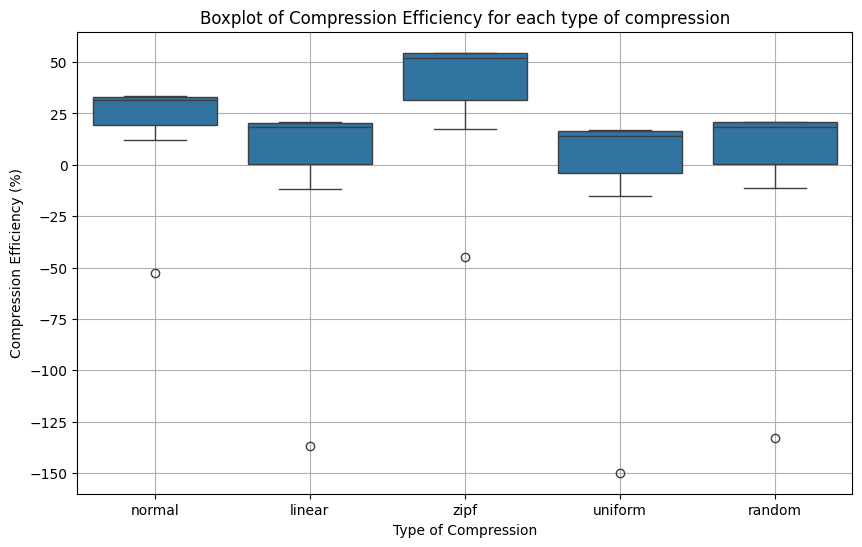

In [137]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type', y='compression_efficiency')
plt.xlabel('Type of Compression')
plt.ylabel('Compression Efficiency (%)')
plt.title('Boxplot of Compression Efficiency for each type of compression')
plt.grid(True)
plt.show()